<a href="https://colab.research.google.com/github/tomasborrella/TheValley/blob/main/notebooks/mds%2B3/spark03/Ejemplo_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Pipeline

Notebook por [Tomás Borrella Martín](https://www.linkedin.com/in/tomasborrella/)
.
Ejemplos de [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1kojnLYWyi4FYDxTy3kX-IL5oDsBLL4kxvvibsFHqdPA/edit?usp=sharing)

# 1. Instalación Spark

In [ ]:
# Install JAVA
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Install Spark
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
# Install findspark
!pip install -q findspark

In [ ]:
# Environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# Find spark
import findspark
findspark.init()

In [ ]:
# PySpark 
!pip install pyspark==3.1.2

# 2. Spark Session
Punto de entrada de la aplicación de Spark

In [ ]:
# Imports
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [ ]:
# Create Spark Session
spark = (SparkSession
         .builder
         .master("local[*]")
         .appName("Spark Dataframes")
         .getOrCreate()
)

# Ejemplo

## Objetivo

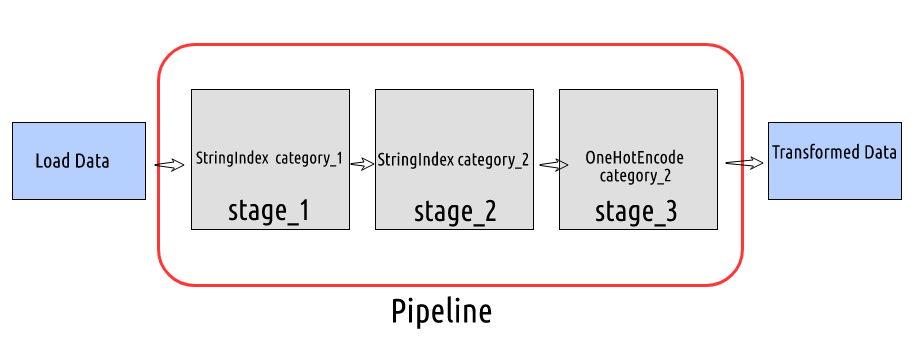

## Cargar datos

In [ ]:
# create a sample dataframe
df = spark.createDataFrame([
    (1, 'L101', 'R'),
    (2, 'L201', 'C'),
    (3, 'D111', 'R'),
    (4, 'F210', 'R'),
    (5, 'D110', 'C')
], ['id', 'category_1', 'category_2'])

df.show()

## Etapas por separado

### Stage 1: StringIndexer
(category 1)

In [ ]:
s1 = StringIndexer(inputCol= 'category_1', outputCol= 'category_1_index')
s1Model = s1.fit(df)
df2 = s1Model.transform(df)

df2.show()

### Stage 2: StringIndexer
(category 2)

In [ ]:
s2 = StringIndexer(inputCol= 'category_2', outputCol= 'category_2_index')
s2Model = s2.fit(df2)
df3 = s2Model.transform(df2)

df3.show()

### Stage 3: OneHotEncoder
(category_2_index)

In [ ]:
s3 = OneHotEncoder(inputCols=['category_2_index'], outputCols=['category_2_OHE'])
s3Model = s3.fit(df3)
df4 = s3Model.transform(df3)

df4.show()

## Etapas en Pipeline

In [ ]:
# stage 1 : transform the column category_1 to numeric
stage_1 = StringIndexer(inputCol= 'category_1', outputCol= 'category_1_index')
# stage 2 : transform the column category_2 to numeric
stage_2 = StringIndexer(inputCol= 'category_2', outputCol= 'category_2_index')
# stage 3 : one hot encode the numeric category_2 column
stage_3 = OneHotEncoder(inputCols=['category_2_index'], outputCols=['category_2_OHE'])

# setup the pipeline
pipeline = Pipeline(stages=[stage_1, stage_2, stage_3])

# fit the pipeline model and transform the data as defined
pipeline_model = pipeline.fit(df)
df_updated = pipeline_model.transform(df)

# view the transformed data
df_updated.show()

# Ejercicio

Partiendo del siguiente DataFrame:


```
df_train = spark.createDataFrame([
    (2.0, 'A', 'S10', 40, 1.0),
    (1.0, 'X', 'E10', 25, 1.0),
    (4.0, 'X', 'S20', 10, 0.0),
    (3.0, 'Z', 'S10', 20, 0.0),
    (4.0, 'A', 'E10', 30, 1.0),
    (2.0, 'Z', 'S10', 40, 0.0),
    (5.0, 'X', 'D10', 10, 1.0),
], ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])
```

Crear el Pipeline que se muestran en la siguiente imagen:

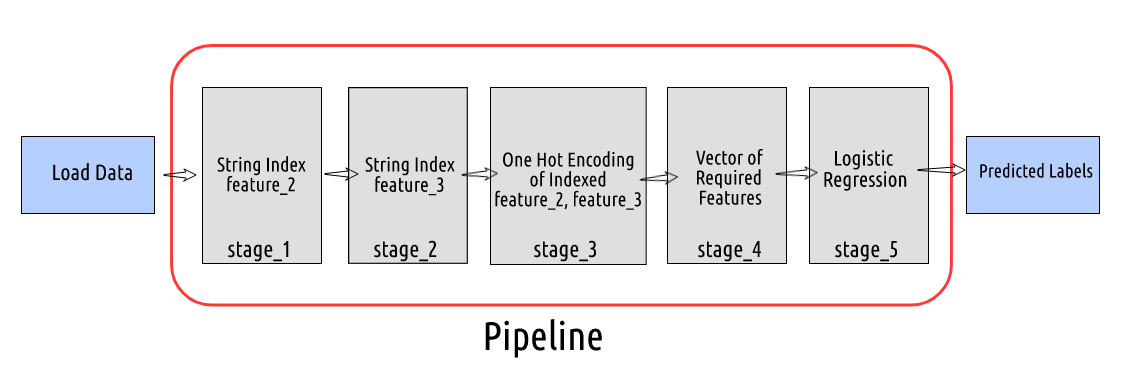

Y utilizar el Pipeline entrenado para predecir las 'label' del siguiente DataFrame:


```
df_test = spark.createDataFrame([
    (3.0, 'Z', 'S10', 40),
    (1.0, 'X', 'E10', 20),
    (4.0, 'A', 'S20', 10),
    (3.0, 'A', 'S10', 20),
    (4.0, 'X', 'D10', 30),
    (1.0, 'Z', 'E10', 20),
    (4.0, 'A', 'S10', 30),
], ['feature_1', 'feature_2', 'feature_3', 'feature_4'])
```



# Spark Stop

In [ ]:
spark.stop()